In [1]:
import pandas as pd
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df=df.iloc[:,1:]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from sklearn.preprocessing import StandardScaler
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
x=df.loc[:,features].values
y=df.loc[:,'Species'].values

In [4]:
x=StandardScaler().fit_transform(x)

In [5]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
prinicpalComponent=pca.fit_transform(x)
principaldf=pd.DataFrame(data=prinicpalComponent,columns=['principal component 1','principal component 2'])

In [6]:
principaldf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [8]:
finaldf=pd.concat([principaldf,df[['Species']]],axis=1)
finaldf.head()

,principal component 1,principal component 2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


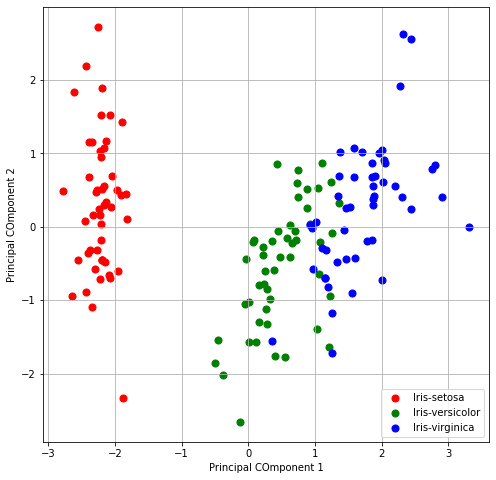

In [11]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Principal COmponent 1')
ax.set_ylabel('Principal COmponent 2')
targets=['Iris-setosa','Iris-versicolor','Iris-virginica']
colors=['r','g','b']
for target,color in zip(targets,colors):
    i=finaldf['Species']==target
    ax.scatter(finaldf.loc[i,'principal component 1'],finaldf.loc[i,'principal component 2'],c=color,s=50)
ax.legend(targets)
ax.grid()

In [12]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])